In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Data Without Noise

200


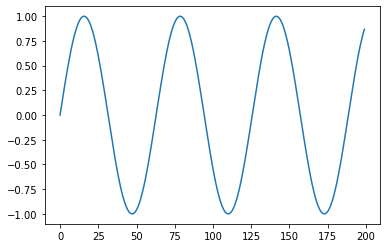

In [8]:
# make synthetic data
series = np.sin(0.1 * np.arange(200))

# optional add noise
#series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [5]:
# build the dataset
T = 10 
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10)  Y.shape:  (190,)


In [10]:
# autoregressive Linear Model
_input = Input(shape=(T,))
x = Dense(1)(_input)
model = Model(_input, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

In [12]:
# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 3ms/sample - loss: 0.4111 - val_loss: 0.4048
Epoch 2/80
95/95 [==============================] - 0s 104us/sample - loss: 0.3440 - val_loss: 0.0467
Epoch 3/80
95/95 [==============================] - 0s 95us/sample - loss: 0.1056 - val_loss: 0.1773
Epoch 4/80
95/95 [==============================] - 0s 100us/sample - loss: 0.1303 - val_loss: 0.0027
Epoch 5/80
95/95 [==============================] - 0s 96us/sample - loss: 0.0276 - val_loss: 0.0782
Epoch 6/80
95/95 [==============================] - 0s 100us/sample - loss: 0.0699 - val_loss: 0.0119
Epoch 7/80
95/95 [==============================] - 0s 98us/sample - loss: 0.0146 - val_loss: 0.0429
Epoch 8/80
95/95 [==============================] - 0s 125us/sample - loss: 0.0455 - val_loss: 0.0190
Epoch 9/80
95/95 [==============================] - 0s 103us/sample - loss: 0.0117 - val_loss: 0.0220
Epoch 10/80
95/95 [========================

95/95 [==============================] - 0s 98us/sample - loss: 2.2036e-11 - val_loss: 3.4011e-12
Epoch 77/80
95/95 [==============================] - 0s 100us/sample - loss: 7.6890e-12 - val_loss: 3.6322e-12
Epoch 78/80
95/95 [==============================] - 0s 113us/sample - loss: 5.0674e-12 - val_loss: 1.2175e-11
Epoch 79/80
95/95 [==============================] - 0s 106us/sample - loss: 6.1002e-12 - val_loss: 7.2550e-12
Epoch 80/80
95/95 [==============================] - 0s 100us/sample - loss: 5.1768e-12 - val_loss: 3.3233e-12


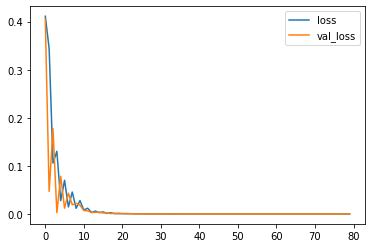

In [14]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

In [15]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)

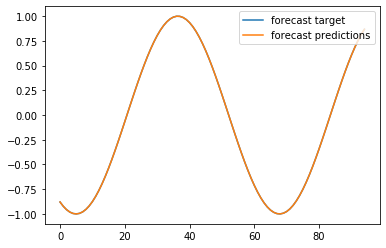

In [16]:
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

In [19]:
# CORRECT way of forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] 
    
    # update
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

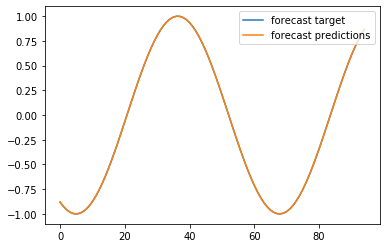

In [20]:
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

### Data With Noise 

200


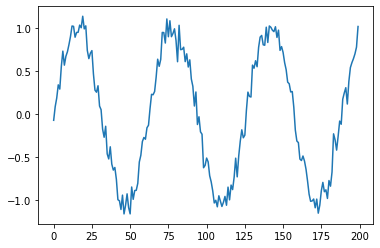

In [28]:
# make synthetic data
series = np.sin(0.1 * np.arange(200))

# optional add noise
series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [29]:
# build the dataset
T = 10 
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10)  Y.shape:  (190,)


In [31]:
# autoregressive Linear Model
_input = Input(shape=(T,))
x = Dense(1)(_input)
model = Model(_input, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.2126 - val_loss: 0.1049
Epoch 2/80
95/95 [==============================] - 0s 89us/sample - loss: 0.0979 - val_loss: 0.0244
Epoch 3/80
95/95 [==============================] - 0s 100us/sample - loss: 0.0413 - val_loss: 0.0344
Epoch 4/80
95/95 [==============================] - 0s 108us/sample - loss: 0.0368 - val_loss: 0.0708
Epoch 5/80
95/95 [==============================] - 0s 100us/sample - loss: 0.0535 - val_loss: 0.0359
Epoch 6/80
95/95 [==============================] - 0s 102us/sample - loss: 0.0408 - val_loss: 0.0268
Epoch 7/80
95/95 [==============================] - 0s 101us/sample - loss: 0.0306 - val_loss: 0.0226
Epoch 8/80
95/95 [==============================] - 0s 98us/sample - loss: 0.0246 - val_loss: 0.0200
Epoch 9/80
95/95 [==============================] - 0s 100us/sample - loss: 0.0234 - val_loss: 0.0214
Epoch 10/80
95/95 [=======================

95/95 [==============================] - 0s 110us/sample - loss: 0.0177 - val_loss: 0.0148


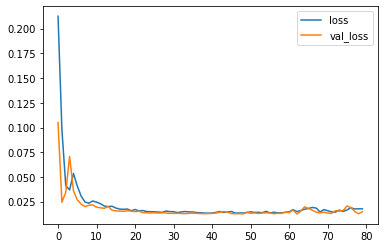

In [32]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

In [33]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)

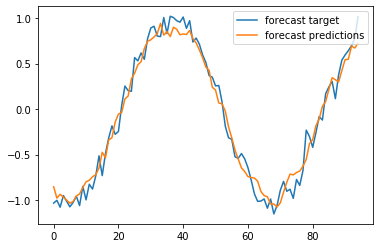

In [34]:
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

In [38]:
# CORRECT way of forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] 
    
    # update
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

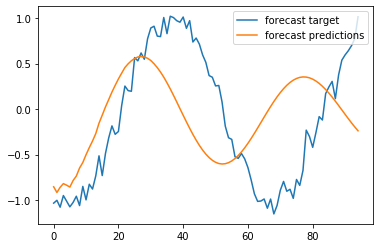

In [39]:
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();